https://www.kaggle.com/c/titanic

In [60]:
import warnings
warnings.simplefilter(action='ignore')

In [62]:
import pandas as pd

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Просмотр первых строк данных
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


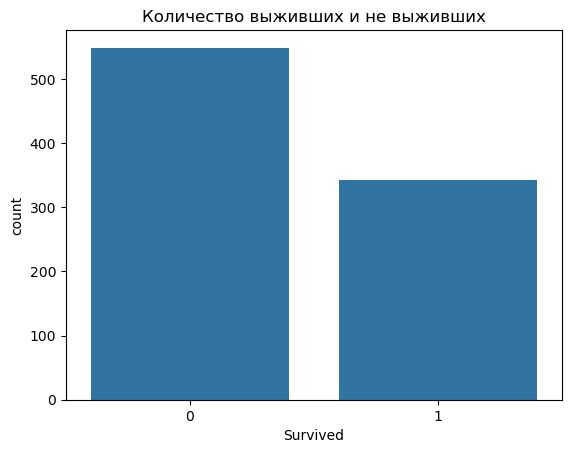

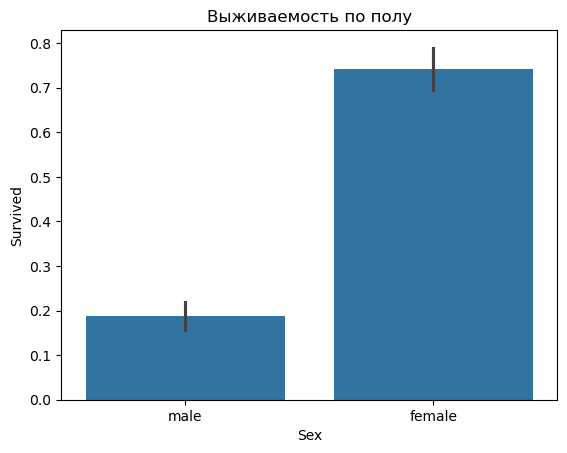

In [64]:
# Исследовательский анализ данных (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация распределения выживших
sns.countplot(x='Survived', data=train_data)
plt.title('Количество выживших и не выживших')
plt.show()

# Визуализация выживаемости по полу
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Выживаемость по полу')
plt.show()

In [47]:
# Заполнение пропусков
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Преобразование категориальных переменных
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Удаление ненужных столбцов
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Разделение на признаки и целевую переменную
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Обучение модели с использованием логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Обучение модели градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Предсказание
y_pred_gb = gb_model.predict(X_test)

# Оценка модели
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy (Gradient Boosting): 0.8044692737430168
Confusion Matrix:
 [[94 11]
 [24 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [54]:
from sklearn.svm import SVC

# Обучение модели SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Предсказание
y_pred_svm = svm_model.predict(X_test)

# Оценка модели
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.7821229050279329
Confusion Matrix:
 [[88 17]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



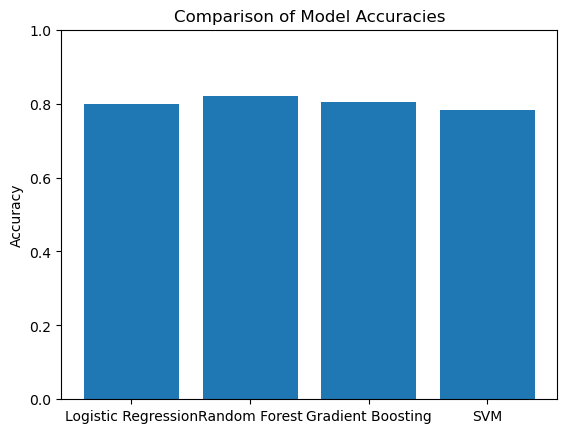

In [56]:
import matplotlib.pyplot as plt

# Сравнение точности моделей
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_svm)]

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()